In [6]:
!pip install textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 4.0 MB/s eta 0:00:00-:--:--


In [9]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /Users/shrutijha/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/shrutijha/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shrutijha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/shrutijha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/shrutijha/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/shrutijha/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


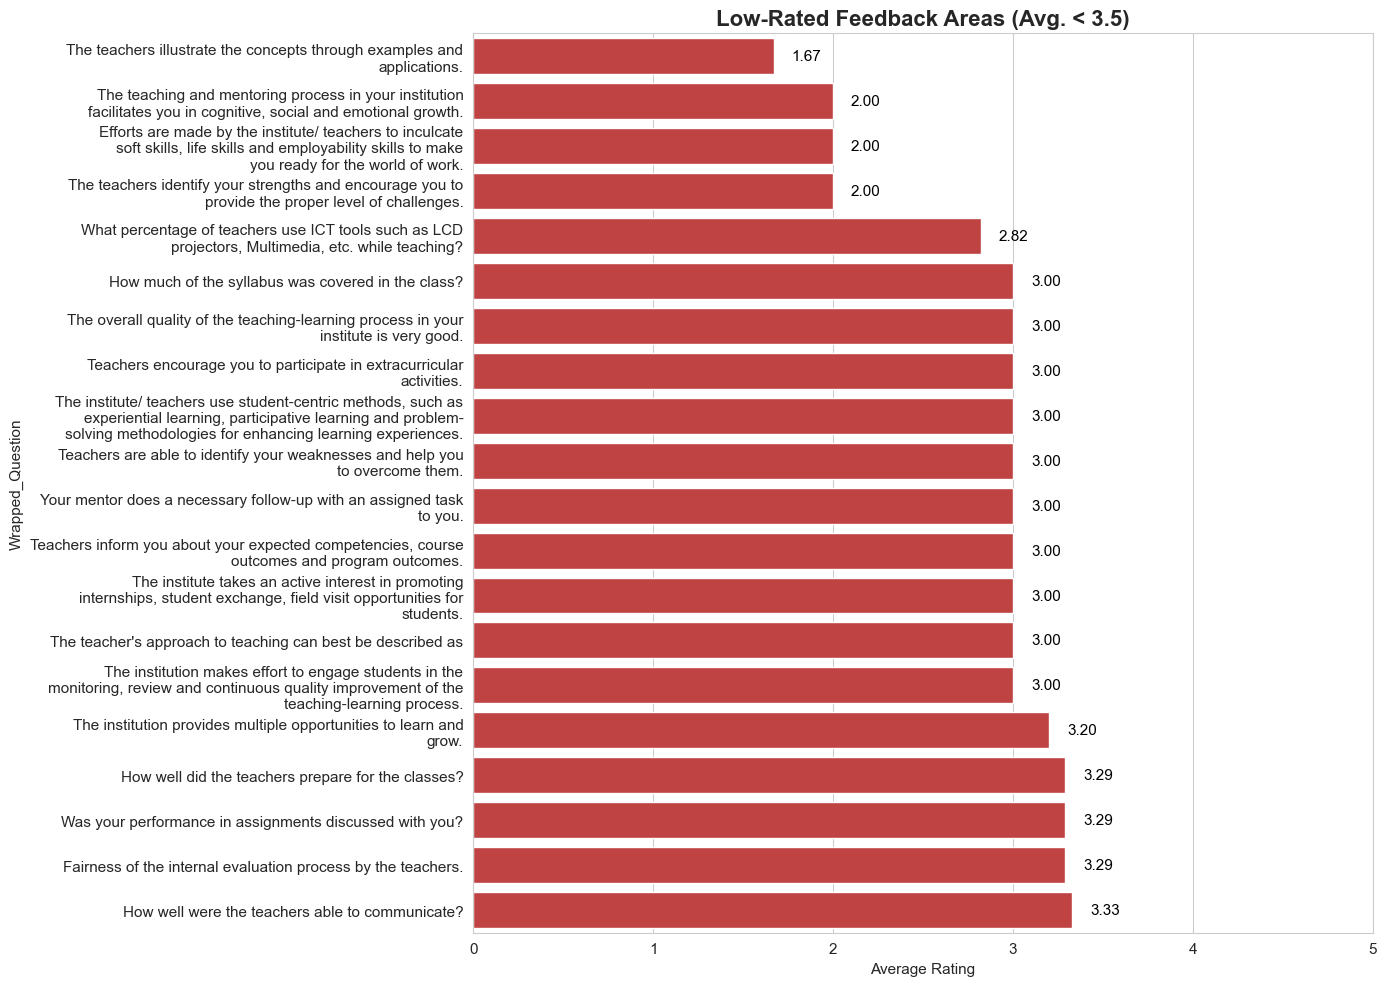

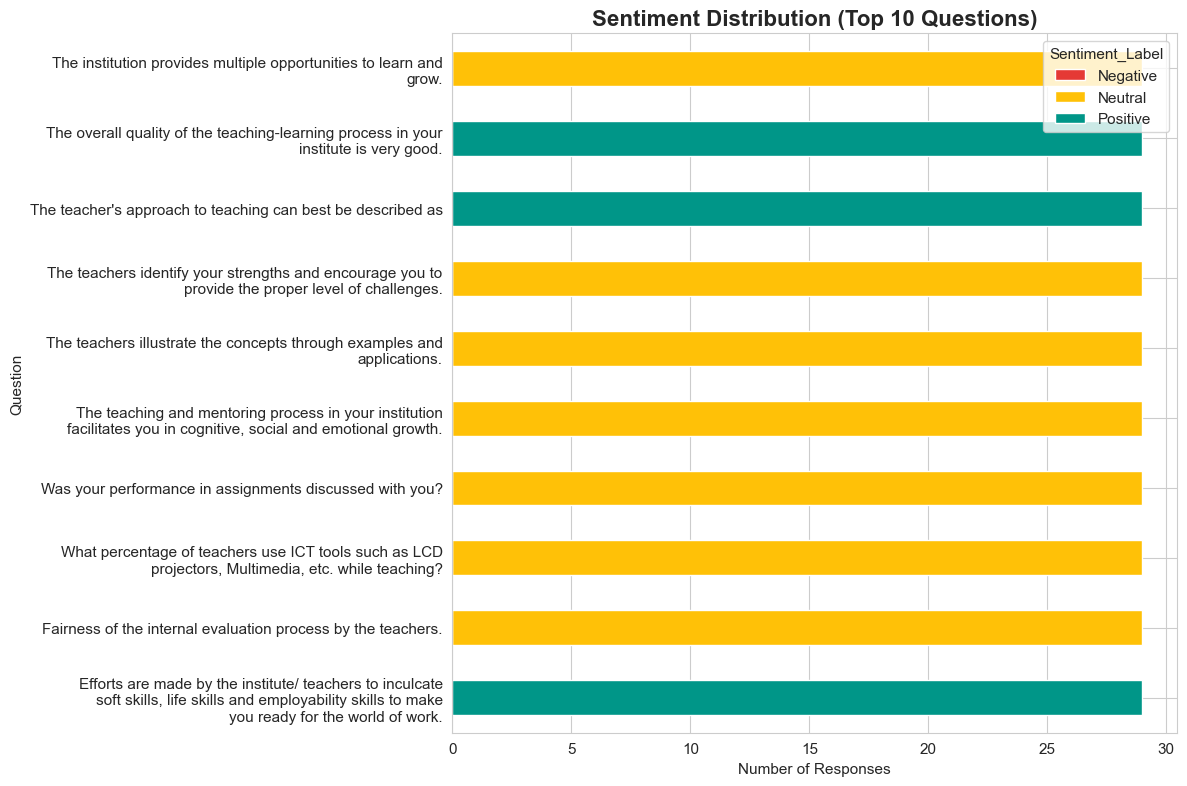

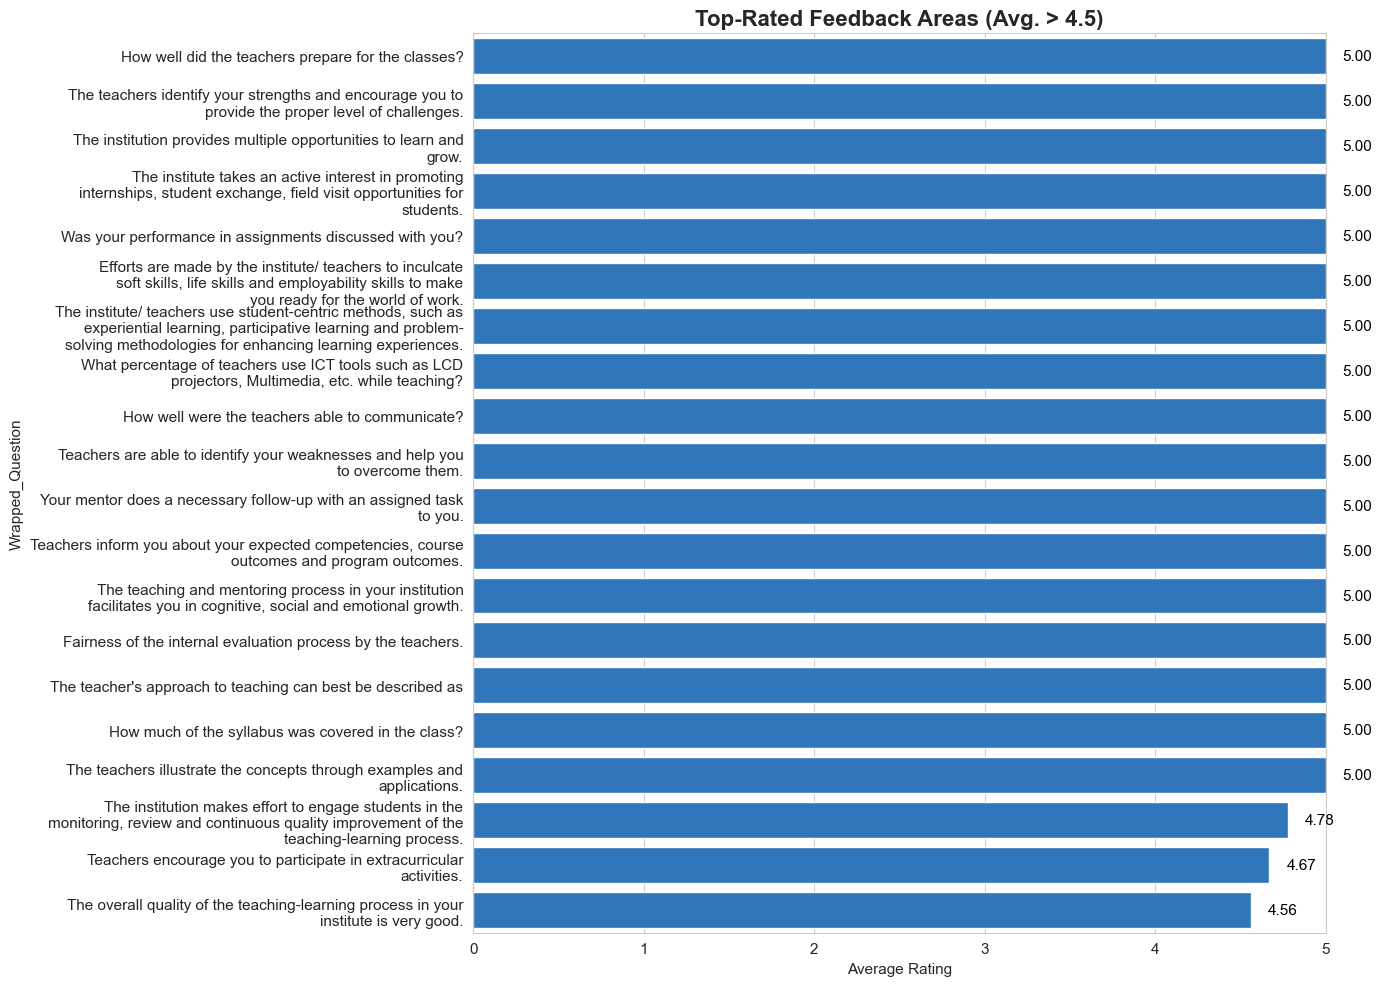

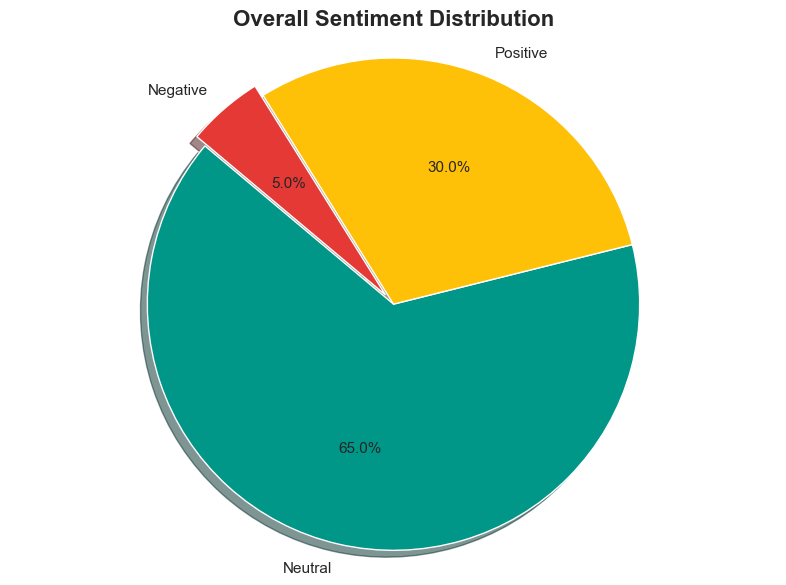

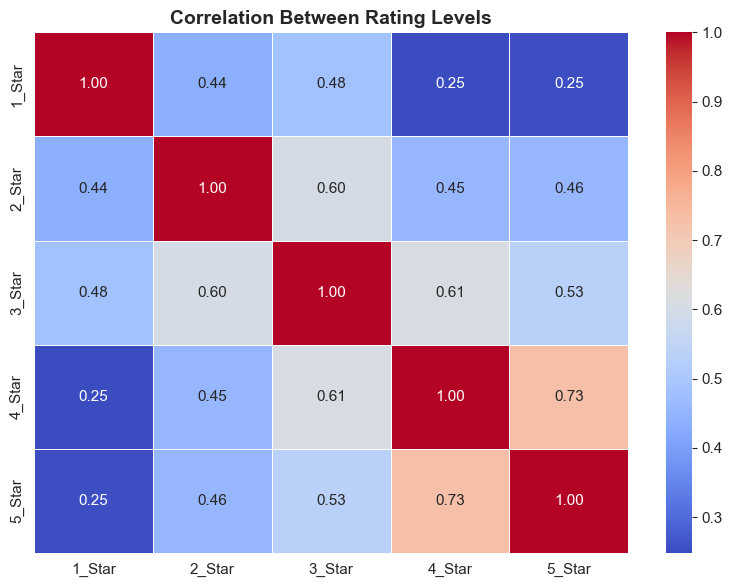

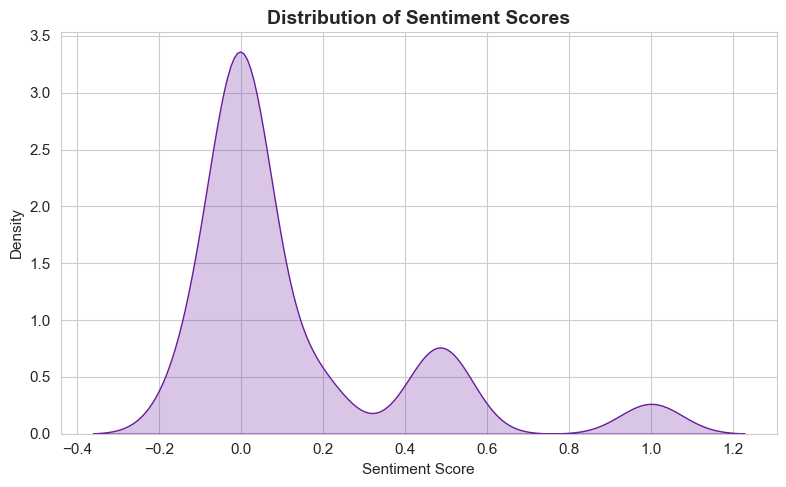

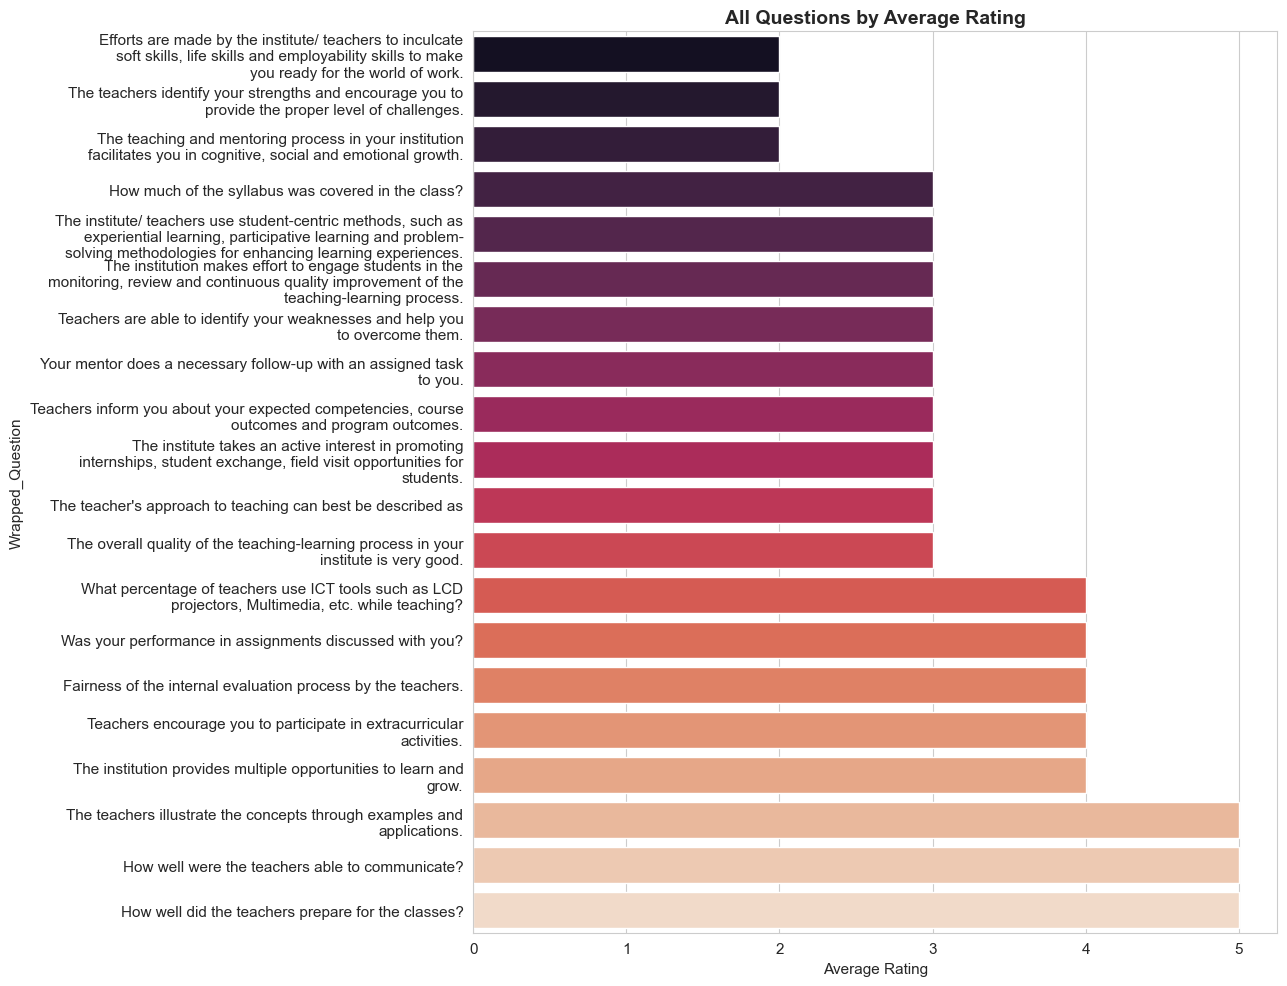

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from textblob import TextBlob


df = pd.read_csv("Student_Satisfaction_Survey.csv", encoding='ISO-8859-1')
df.rename(columns={
    "Questions": "Question",
    "Weightage 1": "1_Star",
    "Weightage 2": "2_Star",
    "Weightage 3": "3_Star",
    "Weightage 4": "4_Star",
    "Weightage 5": "5_Star",
    "Average/ Percentage": "Average_Score"
}, inplace=True)
df["Question"] = df["Question"].str.replace('\x92', "'", regex=False)
df["Average_Numeric"] = df["Average_Score"].str.extract(r'(\d+\.\d+)').astype(float)

df["Sentiment_Score"] = df["Question"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df["Sentiment_Label"] = df["Sentiment_Score"].apply(lambda x: "Positive" if x > 0.1 else "Negative" if x < -0.1 else "Neutral")

def wrap_text(text_list, width=60):
    return ["\n".join(textwrap.wrap(str(q), width)) for q in text_list]

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 11})

low_df = df[df["Average_Numeric"] < 3.5].drop_duplicates("Question").sort_values("Average_Numeric")
low_df["Wrapped_Question"] = wrap_text(low_df["Question"])
plt.figure(figsize=(14, len(low_df) * 0.5))
ax1 = sns.barplot(
    data=low_df,
    x="Average_Numeric",
    y="Wrapped_Question",
    color="#D32F2F"  # Warm red
)
plt.title("Low-Rated Feedback Areas (Avg. < 3.5)", fontsize=16, weight="bold")
plt.xlabel("Average Rating")
plt.xlim(0, 5)
for i, v in enumerate(low_df["Average_Numeric"]):
    ax1.text(v + 0.1, i, f"{v:.2f}", color="black", va="center")
plt.tight_layout()
plt.show()

# Sentiment distribution (top 10)
sentiment_counts = df.groupby(['Question', 'Sentiment_Label']).size().unstack(fill_value=0)
top_questions = sentiment_counts.sum(axis=1).sort_values(ascending=False).head(10)
filtered = sentiment_counts.loc[top_questions.index].copy()
filtered.index = wrap_text(filtered.index)
filtered.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    color={"Positive": "#009688", "Neutral": "#FFC107", "Negative": "#E53935"}  # Teal, Amber, Deep Red
)
plt.title("Sentiment Distribution (Top 10 Questions)", fontsize=16, weight="bold")
plt.xlabel("Number of Responses")
plt.ylabel("Question")
plt.tight_layout()
plt.show()

# Top-rated feedback bar graph
high_df = df[df["Average_Numeric"] > 4.5].drop_duplicates("Question").sort_values("Average_Numeric", ascending=False)
high_df["Wrapped_Question"] = wrap_text(high_df["Question"])
plt.figure(figsize=(14, len(high_df) * 0.5))
ax2 = sns.barplot(
    data=high_df,
    x="Average_Numeric",
    y="Wrapped_Question",
    color="#1976D2"  # Dark blue
)
plt.title("Top-Rated Feedback Areas (Avg. > 4.5)", fontsize=16, weight="bold")
plt.xlabel("Average Rating")
plt.xlim(0, 5)
for i, v in enumerate(high_df["Average_Numeric"]):
    ax2.text(v + 0.1, i, f"{v:.2f}", color="black", va="center")
plt.tight_layout()
plt.show()

# Sentiment Pie Chart
sentiment_pie = df["Sentiment_Label"].value_counts()
plt.figure(figsize=(8, 6))
colors = ["#009688", "#FFC107", "#E53935"]  # Teal, Amber, Deep Red
explode = [0.05 if s == "Negative" else 0 for s in sentiment_pie.index]
plt.pie(
    sentiment_pie,
    labels=sentiment_pie.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True
)
plt.title("Overall Sentiment Distribution", fontsize=16, weight="bold")
plt.axis("equal")
plt.tight_layout()
plt.show()

# Correlation Heatmap
rating_cols = ["1_Star", "2_Star", "3_Star", "4_Star", "5_Star"]
plt.figure(figsize=(8, 6))
corr = df[rating_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Rating Levels", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

# KDE Plot of Sentiment Scores
plt.figure(figsize=(8, 5))
sns.kdeplot(df["Sentiment_Score"], fill=True, color="#6A1B9A")  # Deep Purple
plt.title("Distribution of Sentiment Scores", fontsize=14, weight="bold")
plt.xlabel("Sentiment Score")
plt.tight_layout()
plt.show()

# All questions sorted by average rating
sorted_df = df.drop_duplicates("Question").sort_values("Average_Numeric")
sorted_df["Wrapped_Question"] = wrap_text(sorted_df["Question"])

plt.figure(figsize=(13, len(sorted_df) * 0.5))  
sns.barplot(
    data=sorted_df,
    x="Average_Numeric",
    y="Wrapped_Question",
    hue="Wrapped_Question",         
    palette="rocket",
    dodge=False,
    legend=False                   
)
plt.title("All Questions by Average Rating", fontsize=14, weight="bold")
plt.xlabel("Average Rating")
plt.tight_layout()
plt.show()
